## Multiple Linear Regression

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [66]:
df = pd.read_csv("/Users/satwikbiswas/Documents/Python/Data/multiple_linear_regression_dataset.csv")

In [67]:
df.info()
df[df.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


,age,experience,income


<Axes: >

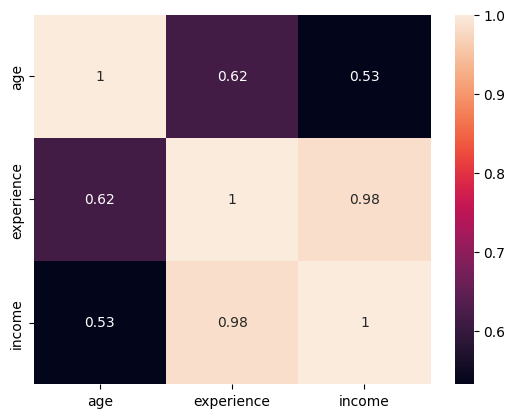

In [68]:
## visualisation

sb.heatmap(df.corr(),annot=True)

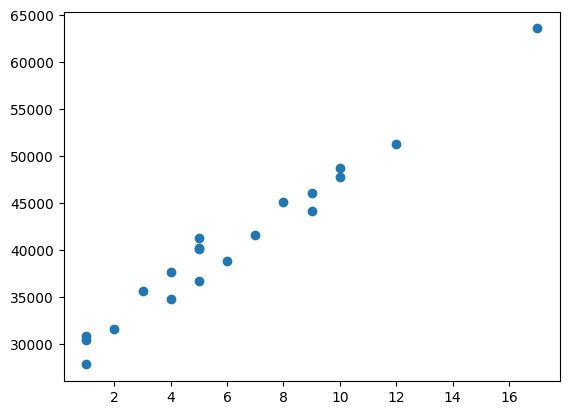

In [69]:
plt.scatter(df["experience"],df["income"])

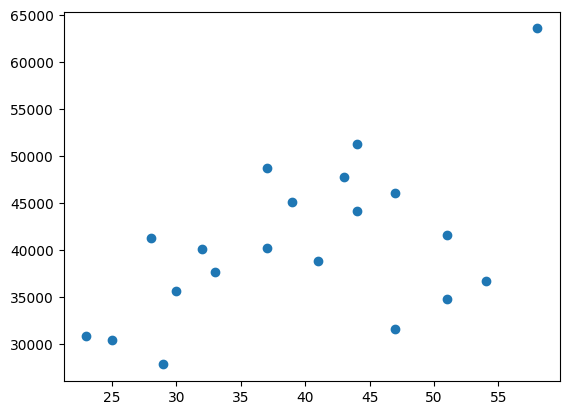

In [70]:
plt.scatter(df["age"],df["income"])

In [71]:
X = df[["age","experience"]]
y = df["income"]


In [72]:
## the train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10,shuffle=True)


<Axes: xlabel='experience', ylabel='income'>

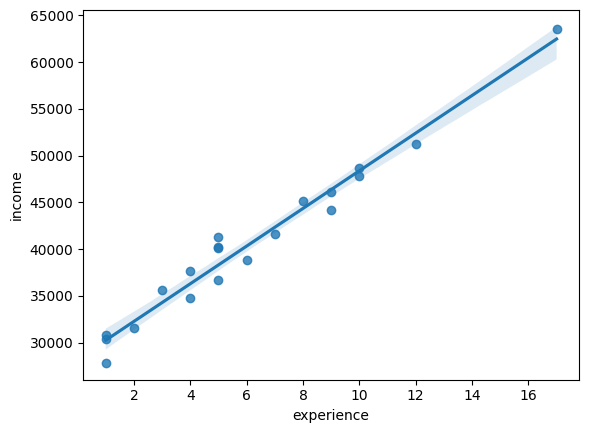

In [73]:
sb.regplot(df,x="experience",y="income")  ## this basically plot data and linear regression fit

In [74]:
## standerisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train.values)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)

[[ 0.27728345  0.50703269]
 [ 1.00515251 -0.64531434]
 [ 0.58922733 -1.10625315]
 [ 0.27728345  1.19844091]
 [-0.45058561 -0.41484493]
 [-1.90632373 -1.33672256]
 [ 1.73302157  2.35078795]
 [-0.45058561  0.7375021 ]
 [ 1.31709639 -0.41484493]
 [ 0.58922733  0.50703269]
 [-1.17845467 -0.87578374]
 [-1.69836114 -1.33672256]
 [-0.03466043 -0.18437553]
 [ 0.17330216  0.7375021 ]
 [-0.24262302  0.27656329]]


/Users/satwikbiswas/Documents/Python/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/satwikbiswas/Documents/Python/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [75]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

## cross validation

Cross-validation is a technique used to assess how well a linear regression model (or any model) generalizes to unseen data. It involves splitting the dataset into multiple subsets (folds) and using them iteratively for training and testing.

    1. Divide the dataset into k equal-sized folds (subsets).
    2. For each iteration, use k−1 folds for training and the remaining 1 fold for testing.
    3. Train the linear regression model on the training folds and evaluate it on the testing fold.
    4. Calculate a performance metric (like Mean Squared Error or R²) for each fold.
    5. Average the metrics from all folds to get a final performance estimate.


In [76]:
## Cross validation
from sklearn.model_selection import cross_val_score

score = cross_val_score(regression,X_train,y_train,scoring="r2",cv=6)
mse_score = score
print(mse_score)
mse_avg = np.mean(mse_score)
mse_avg

[0.94170878 0.9691872  0.97361791 0.96915068 0.94223063 0.78188541]


0.9296301001013333

In [77]:
## R2 value calculation
from sklearn.metrics import r2_score
y_pred = regression.predict(X_test)
score = r2_score(y_true=y_test,y_pred=y_pred)

In [78]:
score

0.8784174922066038

In [79]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [80]:
val = df.at[2,"income"]
val

31580

In [81]:
val_predic = regression.predict(scaler.transform([[47,2]]))
print(abs(val_predic-val))

[399.23294282]


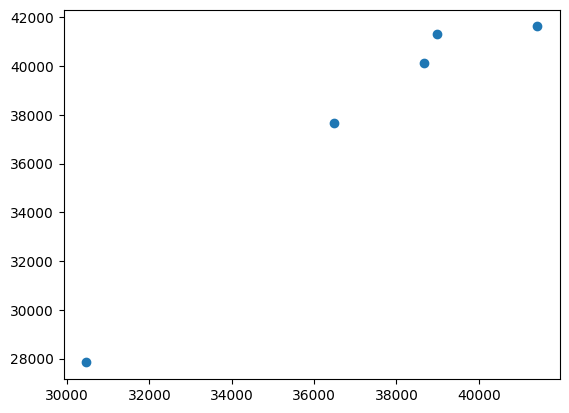

In [82]:
plt.scatter(y_pred,y_test) ## as the coreelation betwwen y_test and y_pred is high thus the model is working good 

In [83]:
error = y_test-y_pred
error

7     1170.533122
10   -2621.291812
5      213.087870
6     2365.573186
3     1464.353132
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Density'>

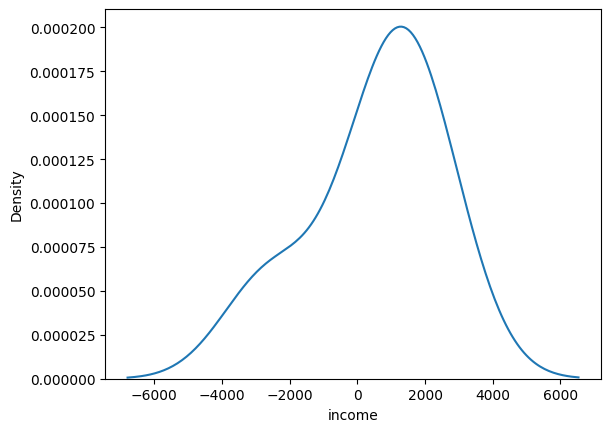

In [84]:
sb.kdeplot(error)  ## the lde plot is almost normal this signifies that most of the cases the error is close to 0 and
                ## the chances of ouliers is low

#The distribution should not be skewed to the left or right. Skewness would indicate systematic underprediction or overprediction.
# Narrow Spread (Low Variance)

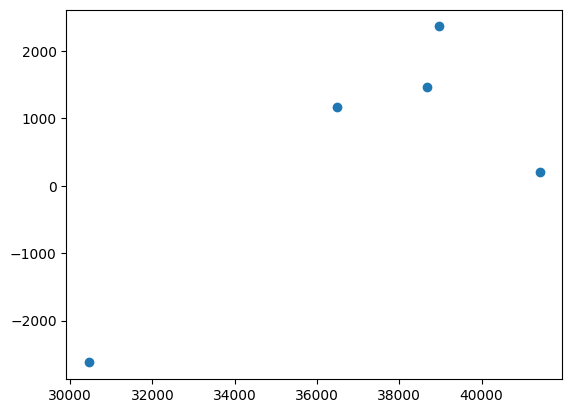

In [85]:
plt.scatter(y_pred,error)  ## this plot should be random signifying no baise